In [1]:
import pickle
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [37]:
%run -i 0_functions.py

In [4]:
all_subsets_hvg = []
division = 5
for i in [1, 2, 3]:
    for j in range(division):
        dataset = read_with_pc(f"data/rep{i}_mono_subset{j}_hvg.h5ad")
        print(dataset.n_obs)
        all_subsets_hvg.append(dataset)

for i in [1, 2, 3]:
    for j in range(division):
        dataset = read_with_pc(f"data/rep{i}_ery_subset{j}_hvg.h5ad")
        print(dataset.n_obs)
        all_subsets_hvg.append(dataset)

744
744
744
744
744
758
758
758
758
758
1386
1386
1386
1386
1386
422
422
422
422
422
640
640
640
640
640
558
558
558
558
558


In [39]:
from tqdm.notebook import tqdm

def run_dynchro(datasets, diag, unique = False):
    results = [[0 for i in range(len(datasets))] for j in range(len(datasets))]

    for i1 in tqdm(range(len(datasets))):
        for j1 in tqdm(range(i1+1, len(datasets)), leave = False):
            # print(f"{i1} {j1}")
            d1 = datasets[i1]
            d2 = datasets[j1]

            if unique:
                # select unique var ids
                obs_ids = list(set(d1.obs_names) ^ set(d2.obs_names))
                d1_mask = d1.obs_names.isin(obs_ids) 
                d2_mask = d2.obs_names.isin(obs_ids)

                d1 = d1[d1_mask, :]
                d2 = d2[d2_mask, :]

            res = dynchro_wrapper(d1, d2, diag)
            results[i1][j1] = res
            # fill it in the other triangle
            # results[j1][i1] = res

    return results

In [8]:
results_no_dup_hvg_2 = run_dynchro(all_subsets_hvg, 2, unique = True)

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

In [9]:
pickle.dump(results_no_dup_hvg_2, open("data/results_no_dup_hvg_2.pkl", "wb"))

In [6]:
results_no_dup_hvg_1 = run_dynchro(all_subsets_hvg, 1, unique = True)

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

In [7]:
pickle.dump(results_no_dup_hvg_1, open("data/results_no_dup_hvg_1.pkl", "wb"))

In [40]:
results_hvg_2 = run_dynchro(all_subsets_hvg, 2, unique = False)
pickle.dump(results_hvg_2, open("data/results_hvg_2.pkl", "wb"))

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

In [41]:
results_hvg_1 = run_dynchro(all_subsets_hvg, 1, unique = False)
pickle.dump(results_hvg_1, open("data/results_hvg_1.pkl", "wb"))

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

# 2. Visualise

In [6]:
results_no_dup_hvg_1 = pickle.load(open("data/results_no_dup_hvg_1.pkl", "rb"))

In [5]:
results_no_dup_hvg_2 = pickle.load(open("data/results_no_dup_hvg_2.pkl", "rb"))

In [7]:
all_labels = ["rep1_sub1_mono", "rep1_sub2_mono", "rep1_sub3_mono", "rep1_sub4_mono", "rep1_sub5_mono", "rep2_sub1_mono", "rep2_sub2_mono", "rep2_sub3_mono", "rep2_sub4_mono", "rep2_sub5_mono", "rep3_sub1_mono", "rep3_sub2_mono", "rep3_sub3_mono", "rep3_sub4_mono", "rep3_sub5_mono", "rep1_sub1_ery", "rep1_sub2_ery", "rep1_sub3_ery", "rep1_sub4_ery", "rep1_sub5_ery", "rep2_sub1_ery", "rep2_sub2_ery", "rep2_sub3_ery", "rep2_sub4_ery", "rep2_sub5_ery", "rep3_sub1_ery", "rep3_sub2_ery", "rep3_sub3_ery", "rep3_sub4_ery", "rep3_sub5_ery"]

In [ ]:
def visualise_norms(results, labels, vmins = None, vmaxs = None):
    dist = [[res[0].dist() if not isinstance(res, int) else 0 for res in res1] for res1 in results]
    dist_norm = [[res[0].dist_norm() if not isinstance(res, int) else 0 for res in res1] for res1 in results]
    dist_norm_orig = [[res[0].dist() / (sum(len(x) for x in res[0].path1().values())) if not isinstance(res, int) else 0 for res in res1] for res1 in results]

    # mirror dist_norm_path and dist_norm_orig around the diagonal
    for i in range(len(dist_norm)):
        for j in range(i+1, len(dist_norm)):
            dist_norm_orig[j][i] = dist_norm_orig[i][j]
            dist[j][i] = dist[i][j]
            dist_norm[j][i] = dist_norm[i][j]

    if vmins is None:
        vmins = [min(min(row) for row in dist), min(min(row) for row in dist_norm), min(min(row) for row in dist_norm_orig)]
    if vmaxs is None:
        vmaxs = [max(max(row) for row in dist), max(max(row) for row in dist_norm), max(max(row) for row in dist_norm_orig)]

    fig, axs = plt.subplots(1, 3, figsize = (15, 5))
    sns.heatmap(dist, xticklabels = labels, yticklabels = labels, ax = axs[0], vmin = vmins[0], vmax = vmaxs[0])
    axs[0].set_title("Distance")
    sns.heatmap(dist_norm, xticklabels = labels, yticklabels = labels, ax = axs[1], vmin = vmins[1], vmax = vmaxs[1])
    axs[1].set_title("Normalized Distance")

    sns.heatmap(dist_norm_orig, xticklabels = labels, yticklabels = labels, ax = axs[2], vmin = vmins[2], vmax = vmaxs[2])
    axs[2].set_title("Original Normalized Distance")
    plt.tight_layout()
    plt.show()


In [ ]:
def cluster(results, labels, linkage, vmins = None, vmaxs = None):
    dist = [[res[0].dist() if not isinstance(res, int) else 0 for res in res1] for res1 in results]
    dist_norm = [[res[0].dist_norm() if not isinstance(res, int) else 0 for res in res1] for res1 in results]
    dist_norm_orig = [[res[0].dist() / (sum(len(x) for x in res[0].path1().values())) if not isinstance(res, int) else 0 for res in res1] for res1 in results]

    # mirror dist_norm_path and dist_norm_orig around the diagonal
    for i in range(len(dist_norm)):
        for j in range(i+1, len(dist_norm)):
            dist_norm_orig[j][i] = dist_norm_orig[i][j]
            dist[j][i] = dist[i][j]
            dist_norm[j][i] = dist_norm[i][j]

    if vmins is None:
        vmins = [min(min(row) for row in dist), min(min(row) for row in dist_norm), min(min(row) for row in dist_norm_orig)]
    if vmaxs is None:
        vmaxs = [max(max(row) for row in dist), max(max(row) for row in dist_norm), max(max(row) for row in dist_norm_orig)]

    c1 = sns.clustermap(dist_norm, xticklabels = labels, yticklabels = labels, vmin = vmins[1], vmax = vmaxs[1], method = linkage)
    c1.fig.set_size_inches(5, 5)

    c2 = sns.clustermap(dist_norm_orig, xticklabels = labels, yticklabels = labels, vmin = vmins[2], vmax = vmaxs[2], method = linkage)
    c2.fig.set_size_inches(5, 5)

In [48]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 5,5


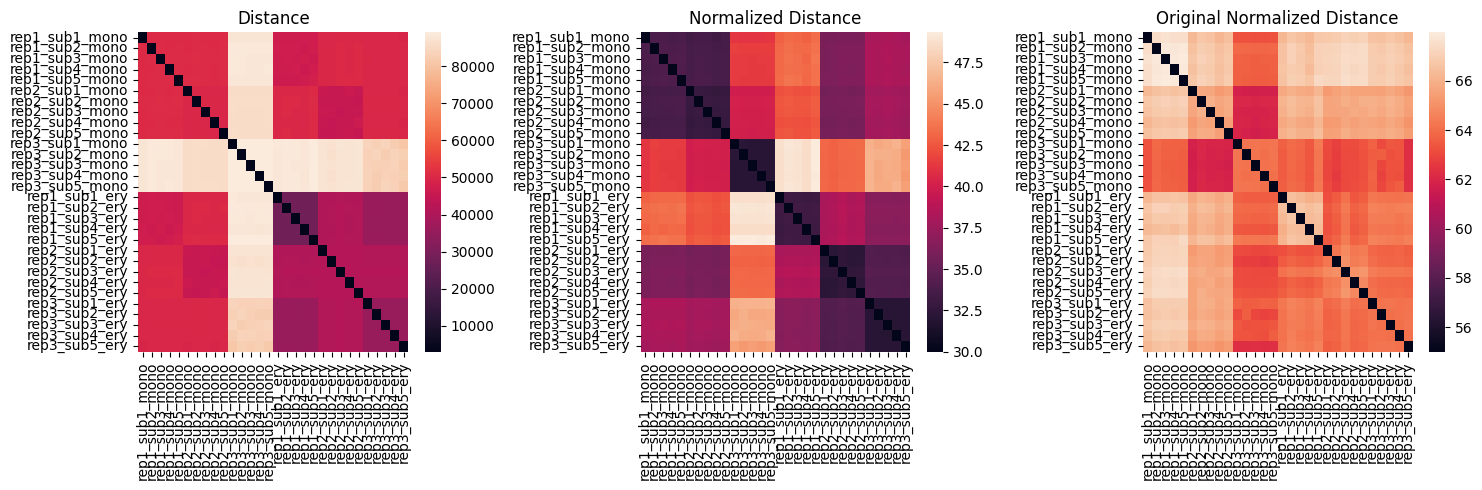

In [24]:
visualise_norms(results_no_dup_hvg_1, all_labels, vmins = [3000, 30, 55])

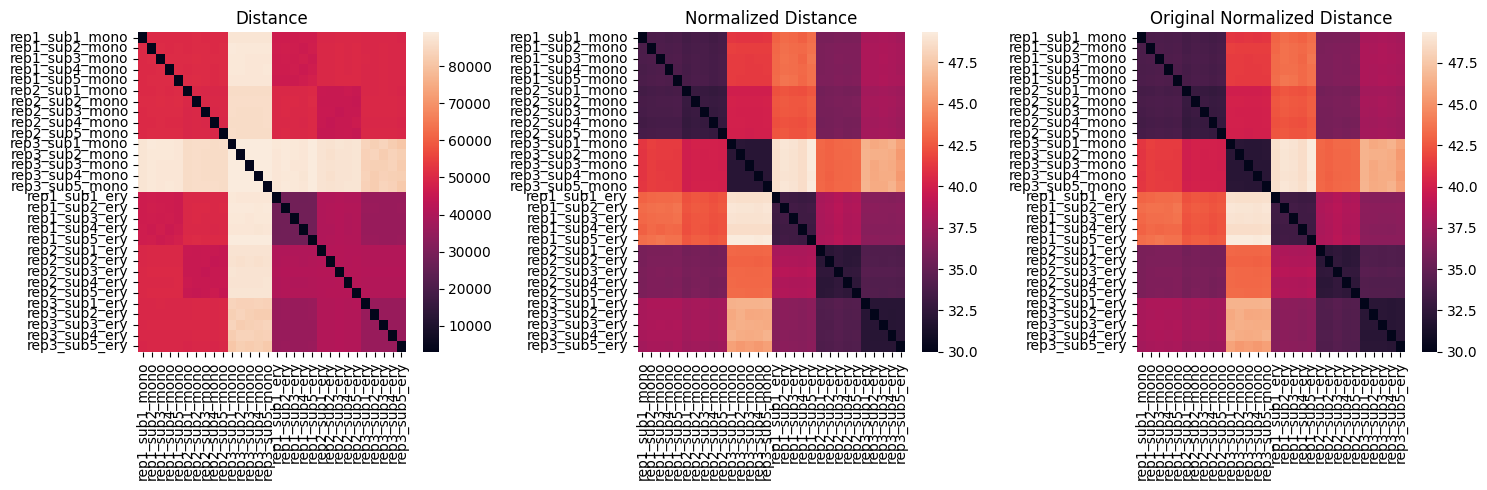

In [22]:
visualise_norms(results_no_dup_hvg_2, all_labels, vmins = [3000, 30, 30])

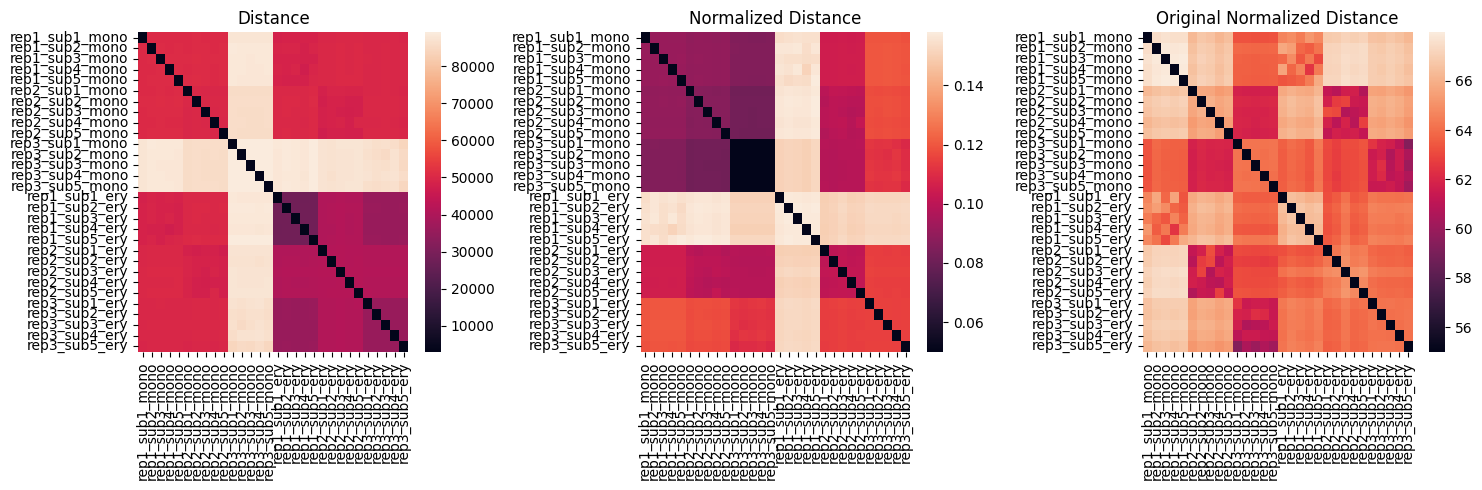

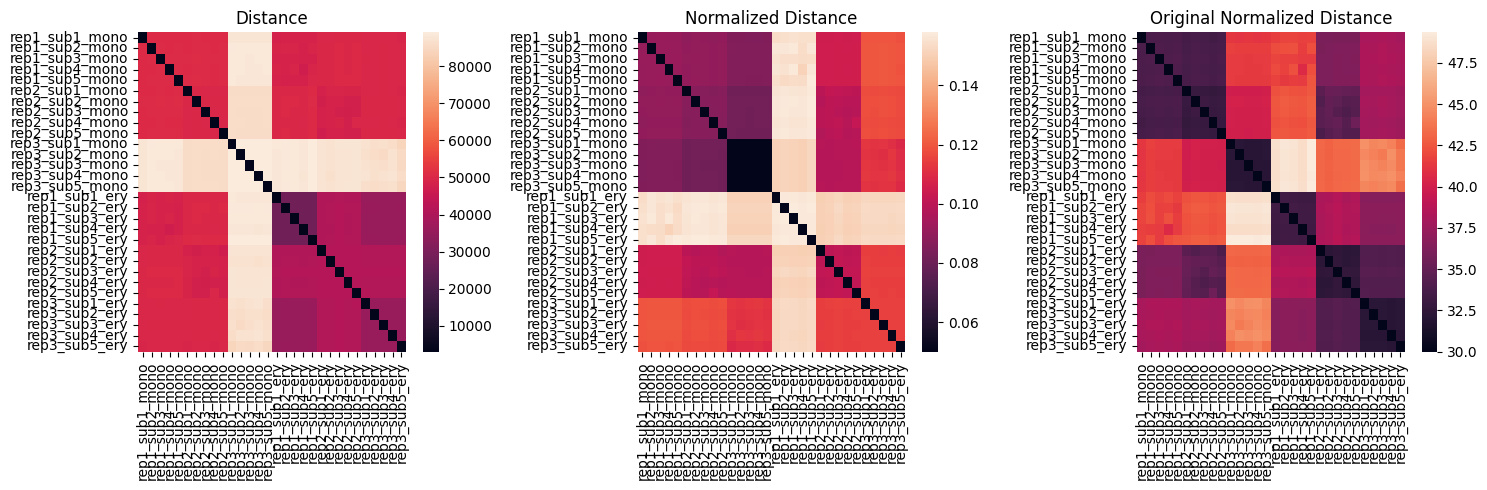

In [55]:
visualise_norms(results_hvg_1, all_labels, vmins = [3000, 0.05, 55])
visualise_norms(results_hvg_2, all_labels, vmins = [3000, 0.05, 30])

In [108]:
linkage = "ward"

/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspici

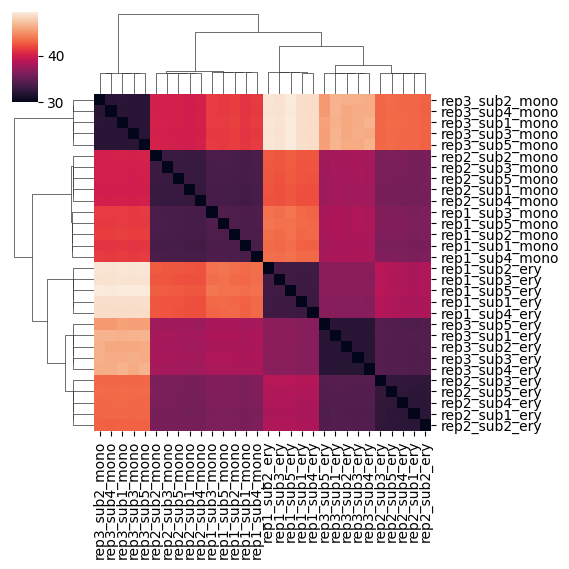

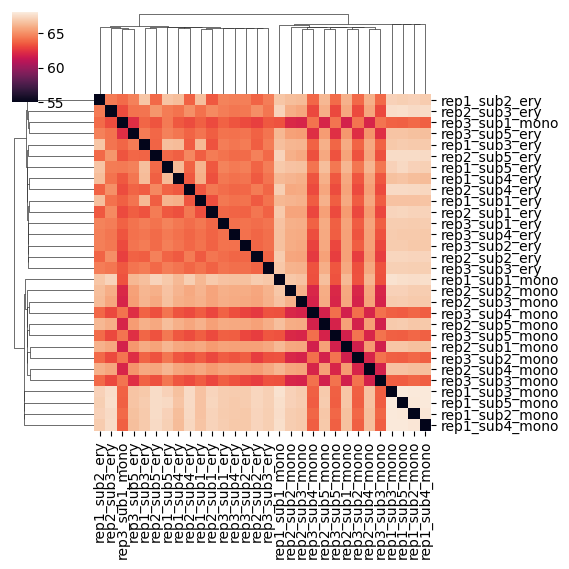

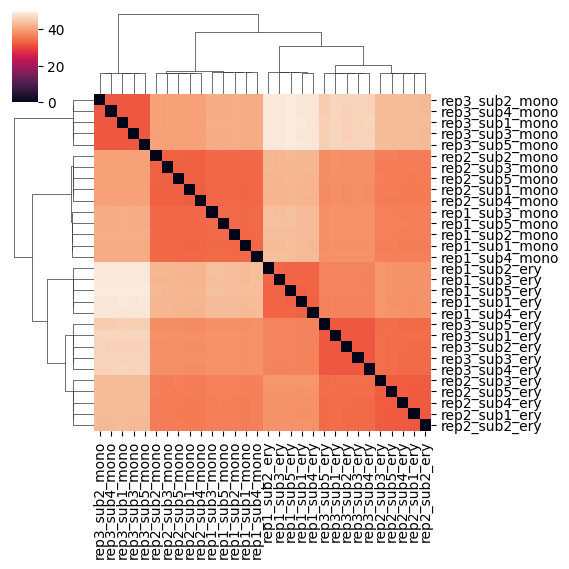

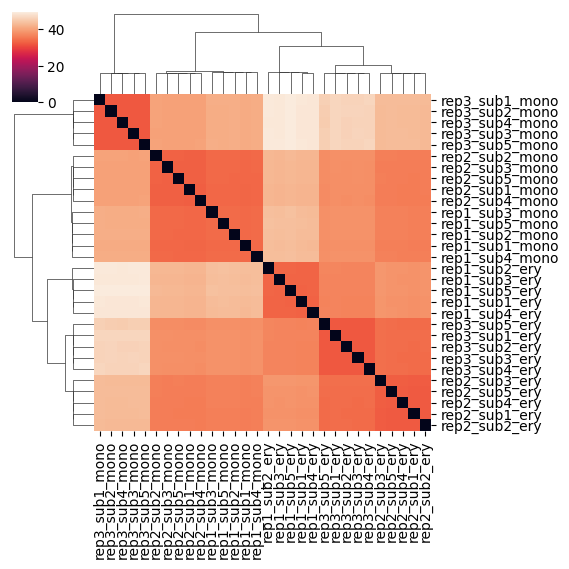

In [109]:
cluster(results_no_dup_hvg_1, all_labels, vmins = [3000, 30, 55], linkage = linkage)
cluster(results_no_dup_hvg_2, all_labels, linkage=linkage)

/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspici

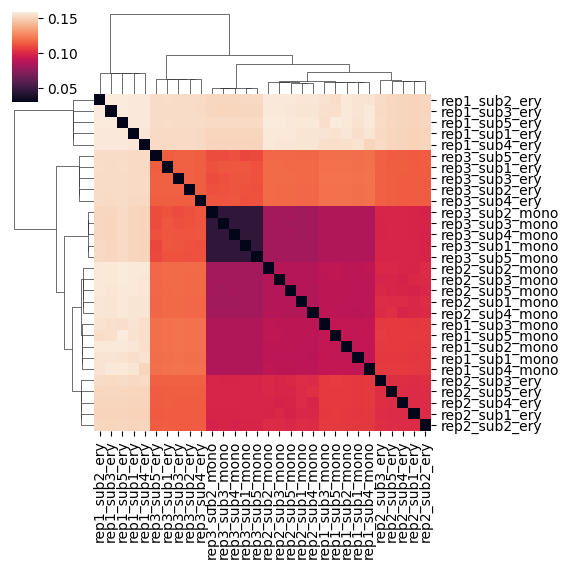

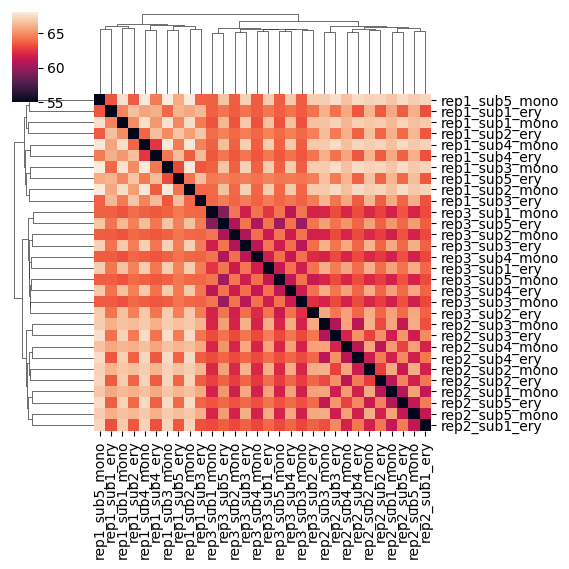

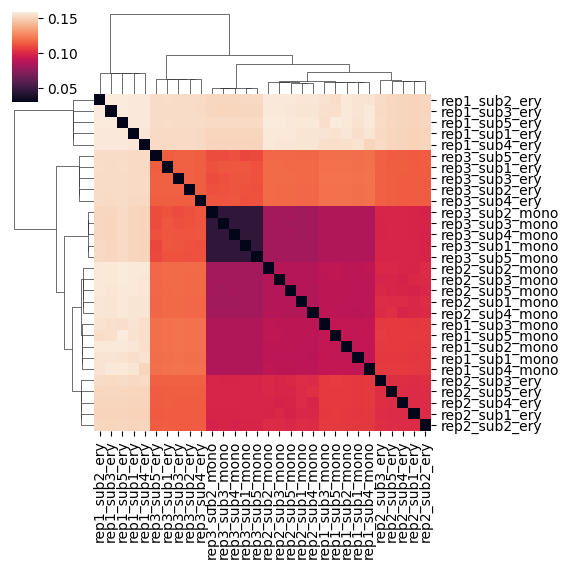

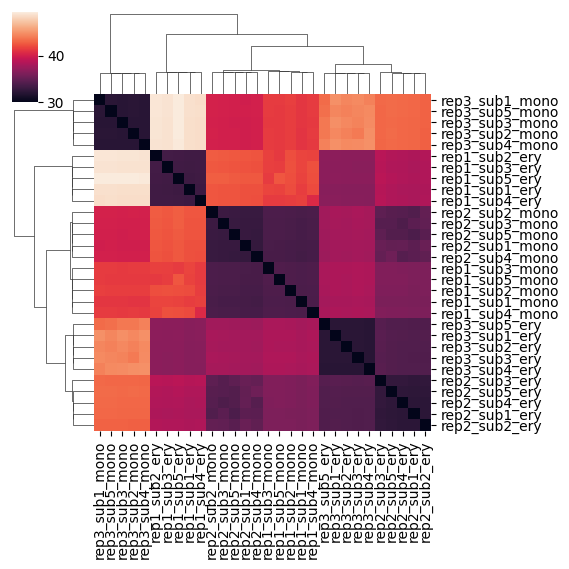

In [95]:
cluster(results_hvg_1, all_labels, vmins = [3000, 0.03, 55], linkage = linkage)
cluster(results_hvg_2, all_labels, vmins = [3000, 0.03, 30], linkage = linkage)